In [1]:
from scipy import *
import matplotlib.pyplot as plt
import math
import numpy as np

import seaborn as sns
import sympy as sym
import numpy as np
import pandas as pd

from sympy.plotting import plot3d

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

# Golden ratio by numberphile

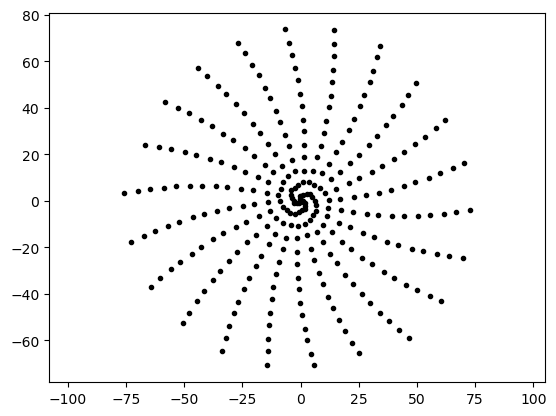

In [2]:
"""
Inspired by Numberphile video on the Golden Ratio:
https://www.youtube.com/watch?v=sj8Sg8qnjOg&t=311s
I wrote a short script to generate a "Golden Ratio Flower" as described in the 
Numberphile video in the youtube link.
"""

phi=(1+np.sqrt(5))/2.0

NTURNS= np.pi #number of turns for each seed placement
theta=360.0/NTURNS 
theta=theta*np.pi/180.0
R=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) #rotation matrix
x=[] #to hold the data
y=[]
D=1
x.append(D) #Choose starting point to be (1,0), although theoretically
y.append(0) #any starting point should work just as fine.
NTRIES=int(NTURNS)*100 #Use as many seeds as possible to make a nice dense flower.
L=1 #scaling factor because seeds cannot lie on top of each other.
count=0
for i in range(NTRIES):
    [X,Y]=np.dot(R,np.array([x[i],y[i]]))
    count=count+1
    if count>=NTURNS:
        count=0
        L=L+D
        [X,Y]=np.dot(L*np.eye(2),np.array([X,Y])/np.sqrt(X**2+Y**2))
    x.append(X)
    y.append(Y) 
plt.plot(x,y,'k.')
plt.axis('equal')
plt.show()

# Seaborn basics

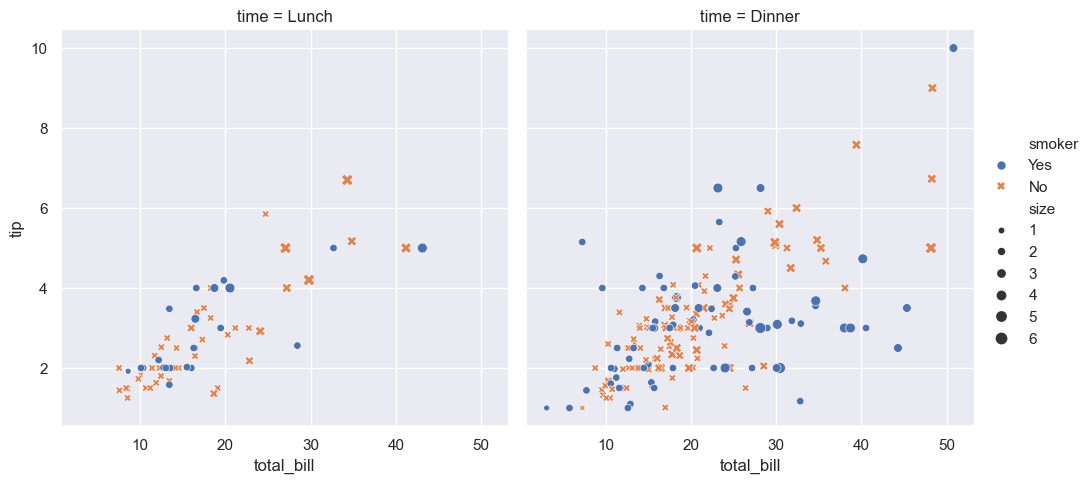

In [3]:
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

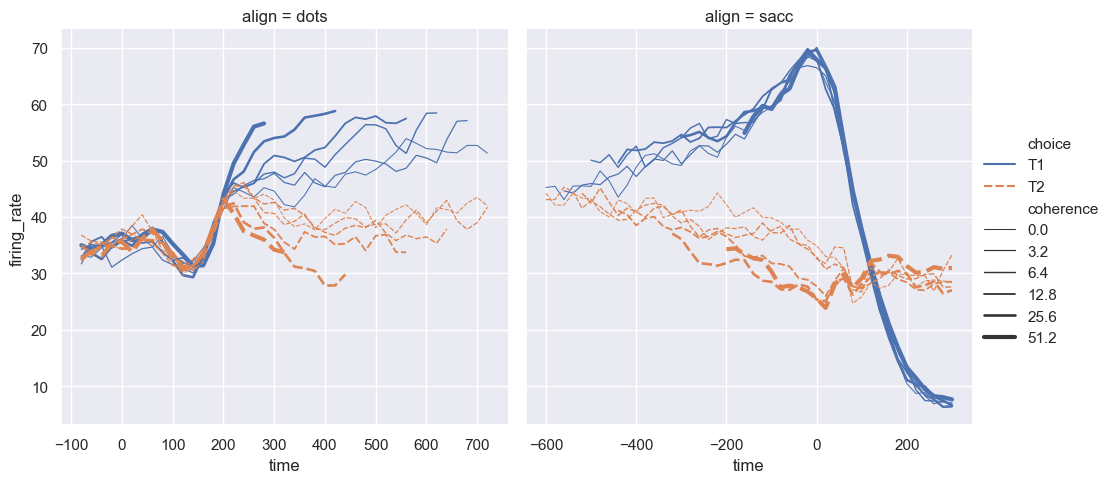

In [4]:
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

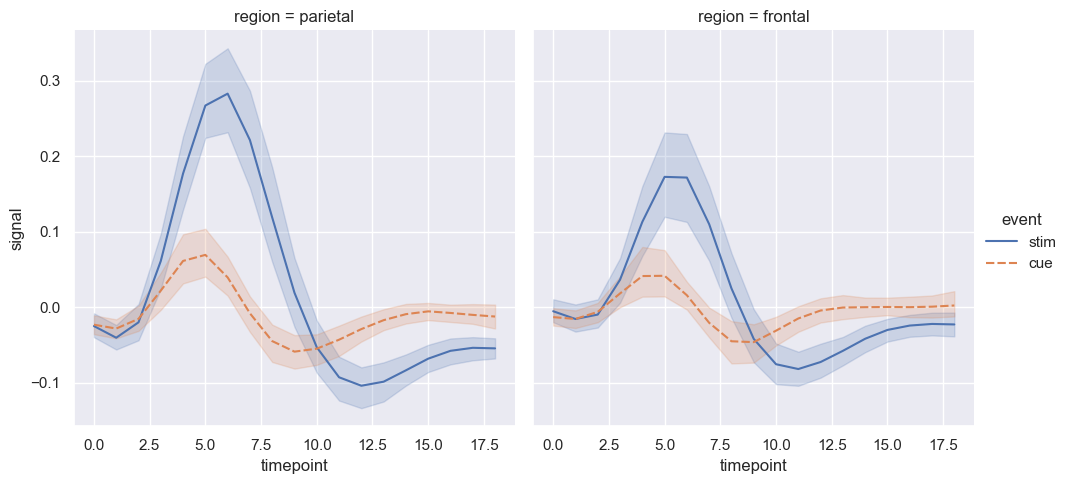

In [5]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

In [6]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


# Plots in 2D and 3D

In [7]:
x = sym.Symbol('x')
y = sym.Symbol('y')

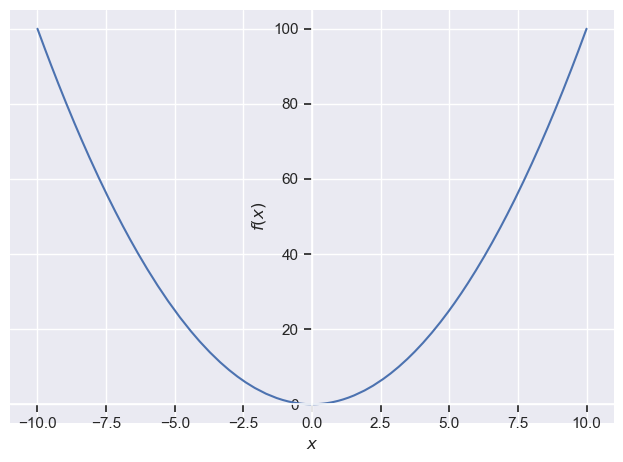

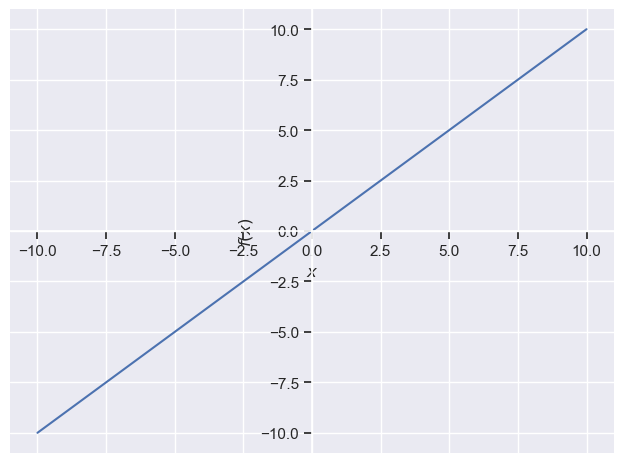

In [8]:
p1 = sym.plot(x*x)
p2 = sym.plot(x)
p1.append(p2[0])
p1

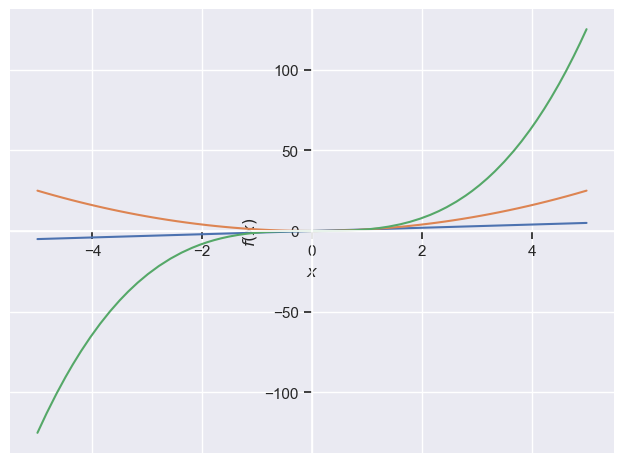

In [9]:
sym.plot(x, x**2, x**3, (x, -5, 5))

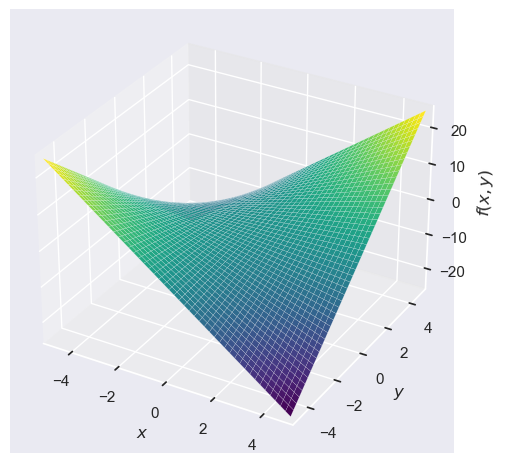

In [10]:
# from sympy.plotting import plot3d

plot3d(x*y, (x, -5, 5), (y, -5, 5))

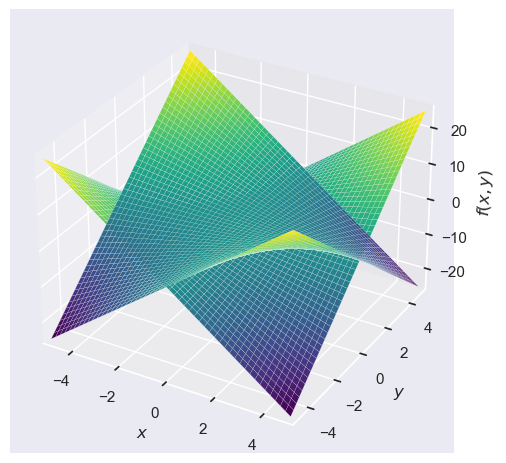

In [11]:
plot3d(x*y, -x*y, (x, -5, 5), (y, -5, 5))

C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_27964\2988165786.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


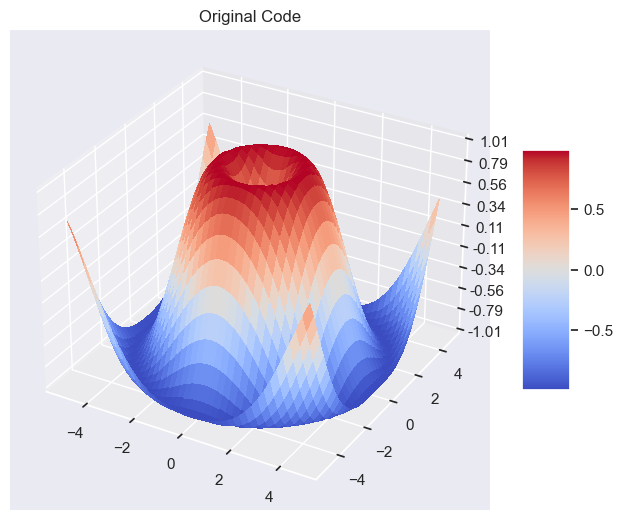

In [12]:
# https://stackoverflow.com/questions/36589521/how-to-surface-plot-3d-plot-from-dataframe
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# from mpl_toolkits.mplot3d import Axes3D


## Matplotlib Sample Code using 2D arrays via meshgrid
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')
plt.show()

In [13]:
x = X.reshape(1600)
y = Y.reshape(1600)
z = Z.reshape(1600)
df = pd.DataFrame({'x': x, 'y': y, 'z': z}, index=range(len(x)))

# Plot using `.trisurf()`:

ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
plt.show()

## Scaterplot 3D

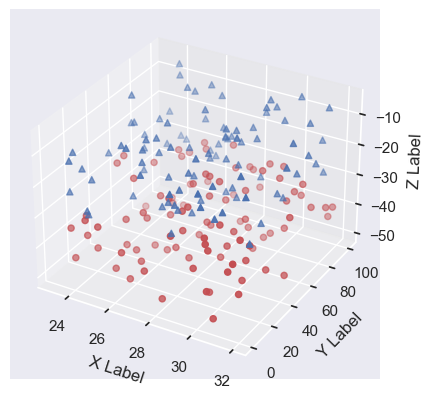

In [14]:
#from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt
#import numpy as np

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## Subplots

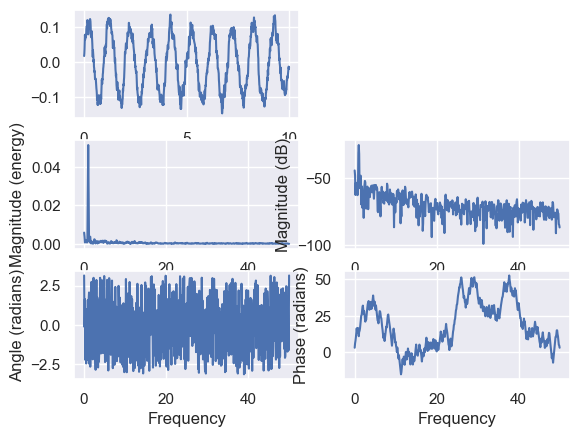

In [15]:
np.random.seed(0)

dt = 0.01
Fs = 1/dt
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t/0.05)

cnse = np.convolve(nse, r)*dt
cnse = cnse[:len(t)]
s = 0.1*np.sin(2*np.pi*t) + cnse

plt.subplot(3, 2, 1)
plt.plot(t, s)

plt.subplot(3, 2, 3)
plt.magnitude_spectrum(s, Fs=Fs)

plt.subplot(3, 2, 4)
plt.magnitude_spectrum(s, Fs=Fs, scale='dB')

plt.subplot(3, 2, 5)
plt.angle_spectrum(s, Fs=Fs)

plt.subplot(3, 2, 6)
plt.phase_spectrum(s, Fs=Fs)

plt.show()


# References

**Seaborn Basics**

* [Fusion Charts.](https://www.fusioncharts.com/blog/best-python-data-visualization-libraries/)
* [Seaborn pydata.](https://seaborn.pydata.org/)
* [Seaborn pydata - Introduction.](https://seaborn.pydata.org/introduction.html)
* [Seaborn pydata - Examples.](https://seaborn.pydata.org/examples/index.html)
* [Official seaborn tutorial.](https://seaborn.pydata.org/tutorial.html)
* [Calcplot documentarion.](https://www.mathvalues.org/masterblog/calcplot3d-is-better-than-ever?fbclid=IwAR2qdY4mDJ_rnLKmYi8Ns-qUeRDPkEO_ZRgybDLfb5J7xrboaOpL39xuovM)
* [Calcplot 3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
